In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Find and Draw Contours

In [12]:
img = cv2.imread('./images/opencv-logo-white.png')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
print("Number of contours = " + str(len(contours)))
print(contours[0])

# Draw contours
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)

cv2.imshow("image", img)
cv2.imshow("Image Gray", imgray)
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of contours = 12
[[[ 91 199]]

 [[ 91 200]]

 [[ 91 201]]

 [[ 91 202]]

 [[ 91 203]]

 [[ 91 204]]

 [[ 91 205]]

 [[ 91 206]]

 [[ 91 207]]

 [[ 91 208]]

 [[ 91 209]]

 [[ 91 210]]

 [[ 91 211]]

 [[ 91 212]]

 [[ 91 213]]

 [[ 91 214]]

 [[ 91 215]]

 [[ 91 216]]

 [[ 91 217]]

 [[ 91 218]]

 [[ 91 219]]

 [[ 91 220]]

 [[ 91 221]]

 [[ 91 222]]

 [[ 91 223]]

 [[ 91 224]]

 [[ 91 225]]

 [[ 91 226]]

 [[ 91 227]]

 [[ 91 228]]

 [[ 92 228]]

 [[ 93 228]]

 [[ 94 228]]

 [[ 95 228]]

 [[ 96 228]]

 [[ 97 228]]

 [[ 98 228]]

 [[ 98 227]]

 [[ 98 226]]

 [[ 98 225]]

 [[ 98 224]]

 [[ 98 223]]

 [[ 98 222]]

 [[ 98 221]]

 [[ 98 220]]

 [[ 98 219]]

 [[ 98 218]]

 [[ 98 217]]

 [[ 98 216]]

 [[ 98 215]]

 [[ 98 214]]

 [[ 98 213]]

 [[ 98 212]]

 [[ 98 211]]

 [[ 99 210]]

 [[100 209]]

 [[101 209]]

 [[102 208]]

 [[103 208]]

 [[104 207]]

 [[105 207]]

 [[106 207]]

 [[107 208]]

 [[108 209]]

 [[108 210]]

 [[108 211]]

 [[108 212]]

 [[108 213]]

 [[108 214]]

 [[108 215

<h2>Motion Detection and Tracking</h2>

In [7]:
import cv2

cap = cv2.VideoCapture('./images/vtest.avi')

# Read the first frame
ret, frame1 = cap.read()

# Read the second frame
ret, frame2 = cap.read()

while cap.isOpened():
    if not ret:
        break

    if frame1.shape == frame2.shape:
        diff = cv2.absdiff(frame1, frame2)
        gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray, (5,5), 0)
        _, thresh = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)
        dilated = cv2.dilate(thresh, None, iterations=3)
        contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
        for contour in contours:
            (x, y, w, h) = cv2.boundingRect(contour)
            
            if cv2.contourArea(contour) < 700:
                continue   # we want to do nothing
            cv2.rectangle(frame1, (x, y), (x+w, y+h), (0, 255, 0), 2)  # This code put rectangle around the moving person
            cv2.putText(frame1, "Status: {}".format('Movement'), (10, 20), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 3) 

        #cv2.drawContours(frame1, contours, -1, (0, 255, 0), 2)

        cv2.imshow("feed", frame1)

    frame1 = frame2
    ret, frame2 = cap.read()

    if cv2.waitKey(40) == 27:
        break

cv2.destroyAllWindows()
cap.release()


<h2>Detect Simple Geometric Shapes</h2>

In [ ]:
img = cv2.imread('./images/shapes.jpg')
img = cv2.resize(img, (800, 600))  # Resize to a smaller size
imgGrey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thrash = cv2.threshold(imgGrey, 240, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thrash, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

cv2.imshow("img", img)
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.01* cv2.arcLength(contour, True), True)
    cv2.drawContours(img, [approx], 0, (0, 0, 0), 5)
    x = approx.ravel()[0]
    y = approx.ravel()[1] - 5
    if len(approx) == 3:
        cv2.putText(img, "Triangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    elif len(approx) == 4:
        x1 ,y1, w, h = cv2.boundingRect(approx)
        aspectRatio = float(w)/h
        print(aspectRatio)
        if aspectRatio >= 0.95 and aspectRatio <= 1.05:
          cv2.putText(img, "square", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
        else:
          cv2.putText(img, "rectangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    elif len(approx) == 5:
        cv2.putText(img, "Pentagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    elif len(approx) == 10:
        cv2.putText(img, "Star", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    else:
        cv2.putText(img, "Circle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))


cv2.imshow("shapes", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Did not work properly

<h2>Understanding Image histograms</h2>

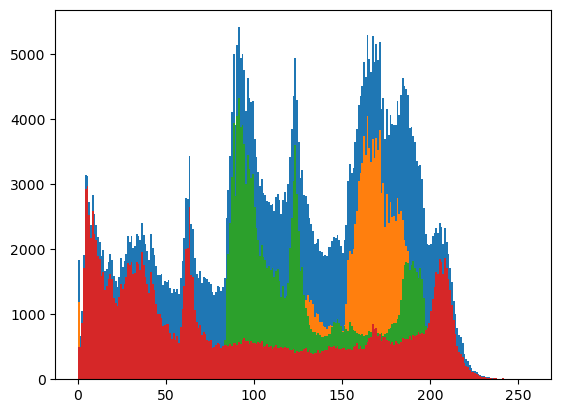

In [26]:
img = cv2.imread('./images/home.jpg')

# img = np.zeros((200, 200), np.uint8)
# cv2.rectangle(img, (0, 100), (200, 200), (255), -1)
# cv2.rectangle(img, (0, 50), (100, 100), (127), -1)

b,g,r = cv2.split(img)

cv2.imshow("img", img)
cv2.imshow("b", b)
cv2.imshow("g", g)
cv2.imshow("r", r)

plt.hist(img.ravel(), 256, [0, 256])
plt.hist(b.ravel(), 256, [0, 256])
plt.hist(g.ravel(), 256, [0, 256])
plt.hist(r.ravel(), 256, [0, 256])

plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

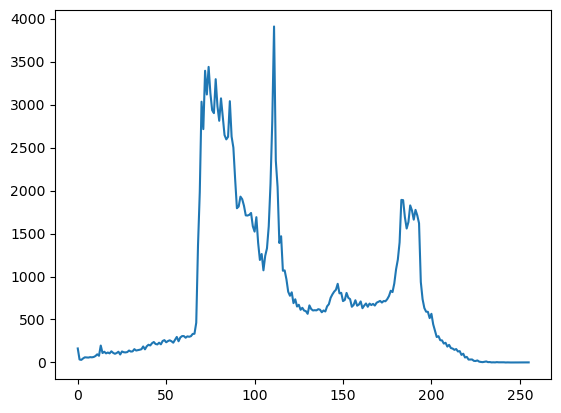

In [27]:
# using cv2.calcHist
img = cv2.imread('./images/home.jpg', 0)

hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist)

plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

## Template matching

In [55]:
img = cv2.imread('./images/messi5.jpg')
grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template = cv2.imread('./images/messi_face.jpg', 0)
w,h= template.shape[::-1]

res = cv2.matchTemplate(grey_img, template, cv2.TM_CCORR_NORMED)
print(res)
threshold = 0.8;
loc = np.where(res >= threshold)
print(loc)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,0, 255), 2)
    

cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[0.7377172  0.73842317 0.73827916 ... 0.75429153 0.7558069  0.7573786 ]
 [0.74012965 0.74079376 0.74054056 ... 0.7559265  0.7572677  0.7586405 ]
 [0.74253213 0.74299425 0.7426783  ... 0.75751567 0.7586072  0.75971717]
 ...
 [0.8700308  0.86953604 0.8691542  ... 0.8430353  0.8440294  0.8450294 ]
 [0.86927223 0.86878365 0.8683665  ... 0.84273875 0.84378684 0.84489083]
 [0.86830777 0.8678636  0.86744946 ... 0.84271294 0.8437743  0.84482956]]
(array([  0,   0,   0, ..., 248, 248, 248], dtype=int64), array([246, 247, 248, ..., 450, 451, 452], dtype=int64))


<h3>Hough Line Transform</h3>

Hough Transform is a popular technique to detect any shape, if you can represent that shape in a mathematical form. It can detect the shape even if it is broken or distorted a little bit.

A line in the image space can be expressed with two variables. For example:

cartesian coordinate system: y = mx+c

polar coordinate system:  xcos&theta; + ysin&theta; = r


Hough transformation Algorithm:
1. Edge detection
2. Mapping of edge points to the hough space and storage in an accumulator
3. Interpretation of the accumulator to yield lines of infinite length.
4. Conversion of infinite lines to finite lines

#### Standard Hough Line Transform Method (HoughLines)

In [58]:
img = cv2.imread('./images/sudoku.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #For canny edge detection it is preferred to have gray scale image
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
cv2.imshow('canny',edges)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

for line in lines:
    rho, theta = line[0] # rho is the distace from the coordinates 0,0 (top left corner of the image)
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
    x1 = int(x0 + 1000 * (-b))
    # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
    y1 = int(y0 + 1000 *  (a))
    # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
    x2 = int(x0 - 1000 * (-b))
    # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
    y2 = int(y0 - 1000 * (a))
    cv2.line(img, (x1, y1), (x2, y2), (0,0,255), 2)
    
cv2.imshow('image', img)
k = cv2.waitKey(0)
cv2.destroyAllWindows()

#### Probabilistic Hough Lines Transform (HoughLinesP)

In [62]:
img = cv2.imread('./images/sudoku.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #For canny edge detection it is preferred to have gray scale image
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
cv2.imshow('canny',edges)
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=100, maxLineGap=10)

for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0,255,0), 2)
    
cv2.imshow('image', img)
k = cv2.waitKey(0)
cv2.destroyAllWindows()

## Road Lane Line Detection

(667, 1000, 3)


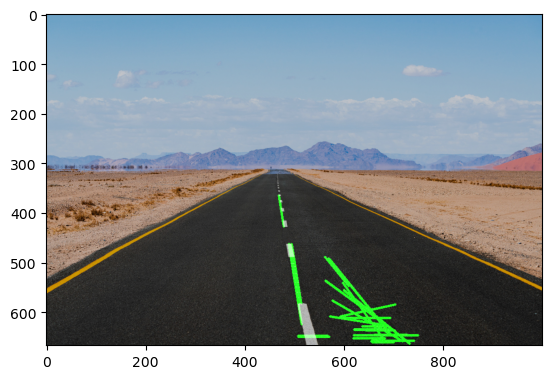

In [81]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
#     channel_count = img.shape[2]
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def drow_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8) # 0 is height and 1 is width
    
    for line in lines:
        for x1, y1, x2, y2  in line:
            cv2.line(blank_image, (x1, y1), (x2, y2), (0,255,0), thickness=4)
    
    img  = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img
    
image = cv2.imread('./images/road.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(image.shape)
height = image.shape[0]
width = image.shape[1]

region_of_interest_vertices = [
    (0, height),
    (width/2, height/2),
    (width, height)
]

gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
canny_image = cv2.Canny(gray_image, 100, 200)
cropped_image = region_of_interest(canny_image, np.array([region_of_interest_vertices], np.int32),)

lines = cv2.HoughLinesP(cropped_image,
                        rho=6,
                        theta=np.pi/60,
                        threshold=160,
                        lines=np.array([]),
                        minLineLength=40,
                        maxLineGap=25)
image_with_lines = drow_the_lines(image, lines)
plt.imshow(image_with_lines)
plt.show()
# cv2.imshow("Road", image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## Circle Detection using OpenCV Hough Circle Transform

<p>(x<sub>center</sub> - x)<sup>2</sup> + (y<sub>center</sub> - y)<sup>2</sup> = r<sup>2</sup></p>

(x_center, y_center) is the center of the circle, and r is the radius of the circle

In [88]:
img = cv2.imread('./images/smarties.png')
output = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5)
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20,
                           param1=50, param2=30, minRadius=0, maxRadius=0)

detected_circles = np.uint16(np.around(circles))
for (x, y, r) in detected_circles[0, :]:
    cv2.circle(output, (x,y), r, (0,255,0), 3)
    cv2.circle(output, (x,y), 2, (0,255,0), 3)

    
cv2.imshow('output', output)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Face Detection using Haar Cascade Classifier

In [3]:
face_cascade = cv2.CascadeClassifier('./images/haarcascade_frontalface_default.xml')

# Read the input image
img = cv2.imread('./images/messi5.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 3)

# Display the output
cv2.imshow('img', img)
cv2.waitKey()

-1

## Face detection from video

In [3]:
face_cascade = cv2.CascadeClassifier('./images/haarcascade_frontalface_default.xml')

# video capture method
cap = cv2.VideoCapture('./images/test.mp4')

while cap.isOpened():
    _, img = cap.read()
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 3)

    # Display the output
    cv2.imshow('img', img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
cap.release()

## Eye Detection Haar Feature based Cascade Classifiers

In [2]:
face_cascade = cv2.CascadeClassifier('./images/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./images/haarcascade_eye_tree_eyeglasses.xml')

# video capture method
cap = cv2.VideoCapture('./images/test.mp4')

while cap.isOpened():
    _, img = cap.read()
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 3)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 5)

    # Display the output
    cv2.imshow('img', img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
cap.release()

## Harris Corner Detector
1. determine which windows produce very large variations in intensity when moved in both X and Y directions.
2. With each such window found, a score R is computed.
3. After applying a threshold to this score, important corners are selected

In [ ]:
img = cv2.imread('./images/chessboard.png')

cv2.imshow('img', img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

dst = cv2.dilate(dst, None)

img[dst > 0.01 * dst.max()] = [0, 0, 255]

cv2.imshow('dst', img)

if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

### Detect Corners with Shi Tomasi Corner Detector 

In [2]:
img = cv2.imread('./images/chessboard.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray, 25, 0.01, 10)

corners = np.int0(corners)
for i in corners:
    x, y = i.ravel()
    cv2.circle(img, (x,y), 3, 255, -1)

cv2.imshow('dst', img)

if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

C:\Users\PC\AppData\Local\Temp\ipykernel_12792\2123482704.py:6: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


## Background Subtraction Methods

In [6]:
cap = cv2.VideoCapture('./images/vtest.avi')
fgbg = cv2.createBackgroundSubtractorMOG2()

while True:
    ret, frame = cap.read()
    if frame is None:
        break
        
    fgmask = fgbg.apply(frame)
    
    cv2.imshow('Frame', frame)
    cv2.imshow('FG Mask Frame', fgmask)

    keyboard = cv2.waitKey(30)
    if keyboard == 'q' or keyboard == 27:
        break
    
cap.release()
cv2.destroyAllWindows()